In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('student_lifestyle_dataset.csv')

In [7]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [9]:
df.shape

(2000, 8)

In [21]:
df.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [31]:
df.duplicated().sum()

0

<Axes: ylabel='Physical_Activity_Hours_Per_Day'>

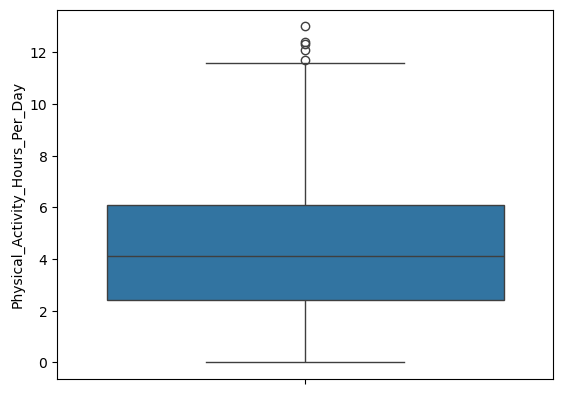

In [61]:
sns.boxplot(df['Physical_Activity_Hours_Per_Day'])

<Axes: xlabel='Physical_Activity_Hours_Per_Day', ylabel='Density'>

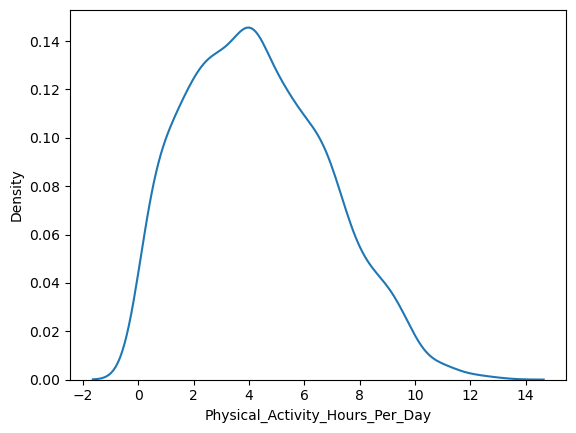

In [65]:
sns.kdeplot(df['Physical_Activity_Hours_Per_Day'])

<Axes: ylabel='GPA'>

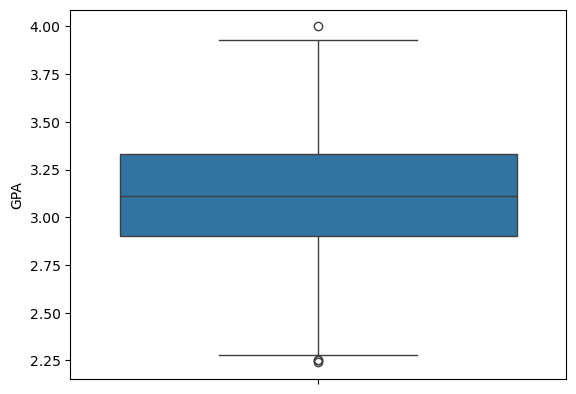

In [71]:
sns.boxplot(df['GPA'])

<Axes: xlabel='Study_Hours_Per_Day', ylabel='GPA'>

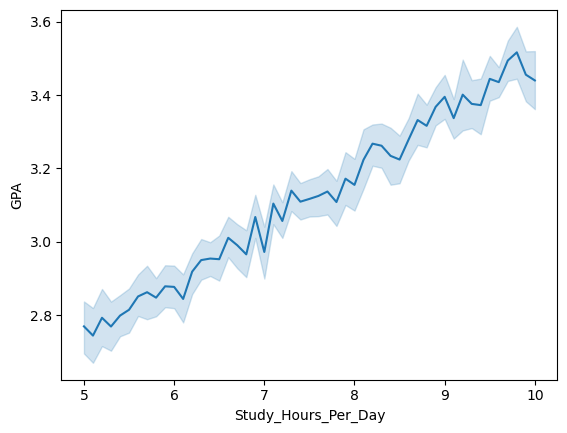

In [73]:
sns.lineplot(x=df['Study_Hours_Per_Day'], y= df['GPA'])

/var/folders/rf/k8tkz2sn5_17bkb1g4k5vnkr0000gn/T/ipykernel_77809/1128131428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Stress_Level'], y=df['GPA'], palette = 'Set2')


<Axes: xlabel='Stress_Level', ylabel='GPA'>

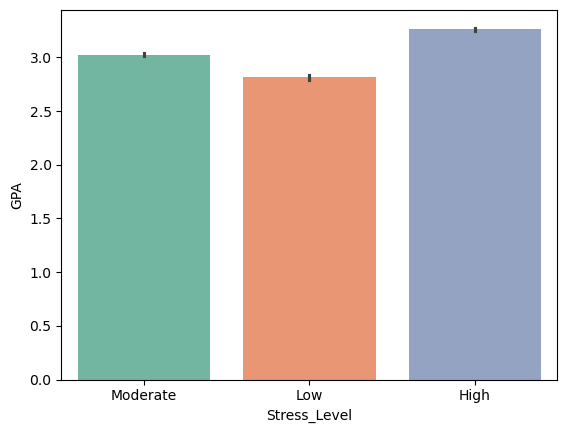

In [89]:
sns.barplot(x=df['Stress_Level'], y=df['GPA'], palette = 'Set2')

<h1>Lets Try to remove outliers from the columns which consists of outliers</h1>

<h2>But first let us find all the columns which have outliers</h2>

In [112]:
#After plotting boxplot for every column, we found out that "Physical_Activity_Hours_per_day" and "GPA" both the columns have outliers

In [114]:
# lets see what kind of distribution is there so that we can think of the methods to remove the ouliers

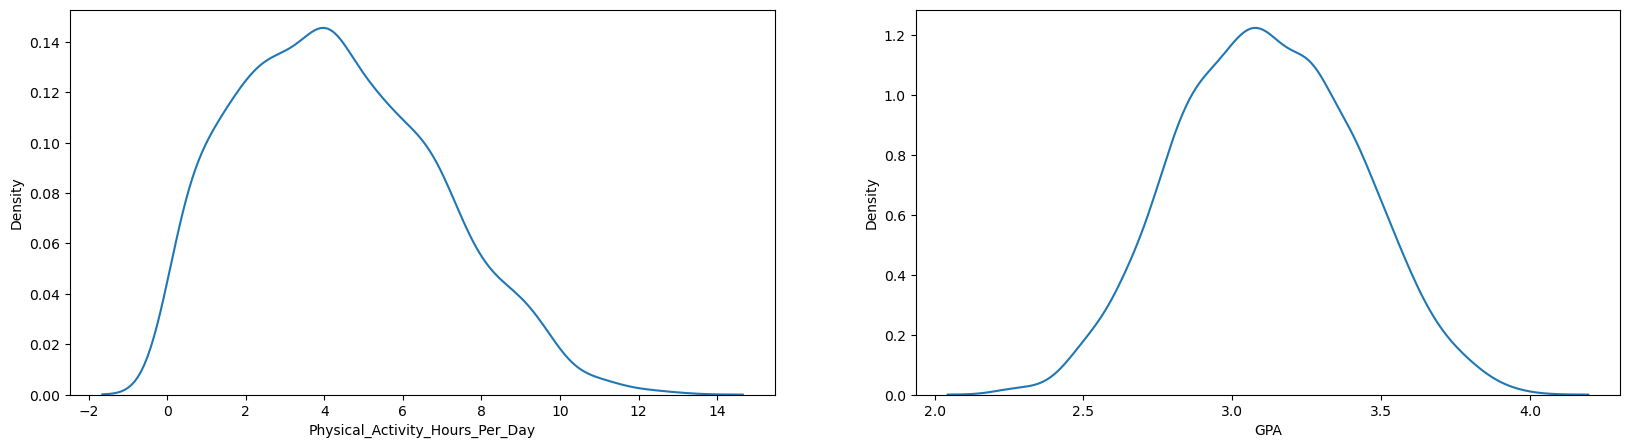

In [120]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.kdeplot(df['Physical_Activity_Hours_Per_Day'])
plt.subplot(122)
sns.kdeplot(df['GPA'])
plt.show()

In [124]:
# As we can see, Physical_Activity_Hours_Per_Day is rightly skewed data
# and GPA is almost a normal distribution

# Therfore we will use the IQR BASED FILTERING METHOD for the Physical activity data
# and we will use the Z-score method for the GPA data, since it is normally distributed

In [126]:
percentile75 = df['Physical_Activity_Hours_Per_Day'].quantile(0.75)
percentile25 = df['Physical_Activity_Hours_Per_Day'].quantile(0.25)

In [128]:
IQR = percentile75 - percentile25

In [130]:
IQR

3.6999999999999997

In [134]:
upperlimit = percentile75 + 1.5*IQR
lowerlimit = percentile25 - 1.5*IQR

In [138]:
print(upperlimit)
print(lowerlimit)

11.649999999999999
-3.15


In [146]:
df['Physical_Activity_Hours_Per_Day'].max()

13.0

In [148]:
new_df = df.copy()

In [150]:
new_df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [152]:
new_df['Physical_Activity_Hours_Per_Day'].shape

(2000,)

In [156]:
import numpy as np

In [158]:
new_df['Physical_Activity_Hours_Per_Day'] = np.where(new_df['Physical_Activity_Hours_Per_Day']<lowerlimit,lowerlimit, np.where(new_df['Physical_Activity_Hours_Per_Day']>upperlimit,upperlimit,new_df['Physical_Activity_Hours_Per_Day']))

In [162]:
new_df['Physical_Activity_Hours_Per_Day'].shape

(2000,)

<Axes: ylabel='Physical_Activity_Hours_Per_Day'>

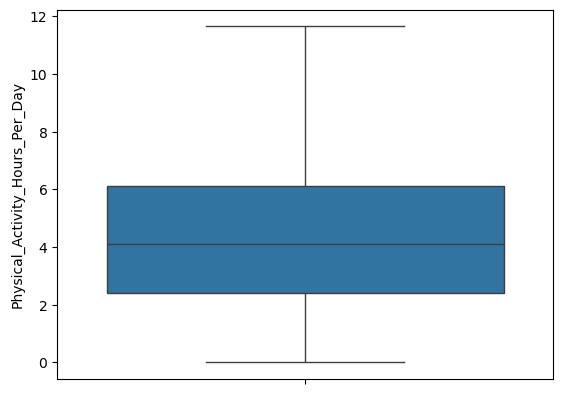

In [164]:
sns.boxplot(new_df['Physical_Activity_Hours_Per_Day'])

In [166]:
#Outliers successfully Removed

In [190]:
#Lets do the same with the GPA column but that column is normally distributed hence we will require Z-score method to check outliers

In [192]:
percentile75z = df['GPA'].quantile(0.75)
percentile25z = df['GPA'].quantile(0.25)

In [194]:
IQR2 = percentile75z - percentile25z

In [196]:
IQR2

0.43000000000000016

In [198]:
upperlimitx = percentile75z + 1.5*IQR2
lowerlimitx = percentile25z - 1.5*IQR2

In [200]:
print(upperlimitx)
print(lowerlimitx)

3.9750000000000005
2.255


In [202]:
newnew_df = df.copy()

In [206]:
newnew_df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


<Axes: ylabel='GPA'>

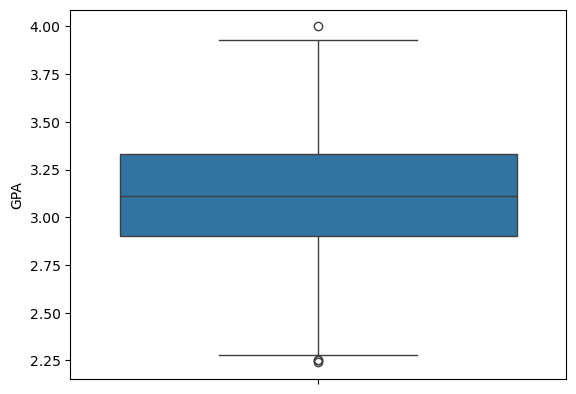

In [208]:
sns.boxplot(newnew_df['GPA'])

In [210]:
newnew_df['GPA'] = np.where(newnew_df['GPA']<lowerlimitx,lowerlimitx, np.where(newnew_df['GPA']>upperlimitx,upperlimitx,newnew_df['GPA']))

<Axes: ylabel='GPA'>

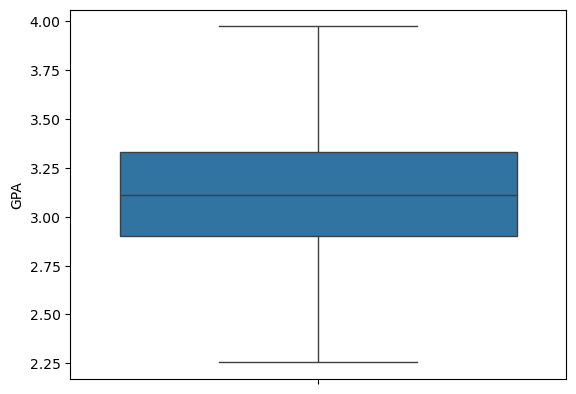

In [212]:
sns.boxplot(newnew_df['GPA'])

In [214]:
# Successfuly removed the outliers

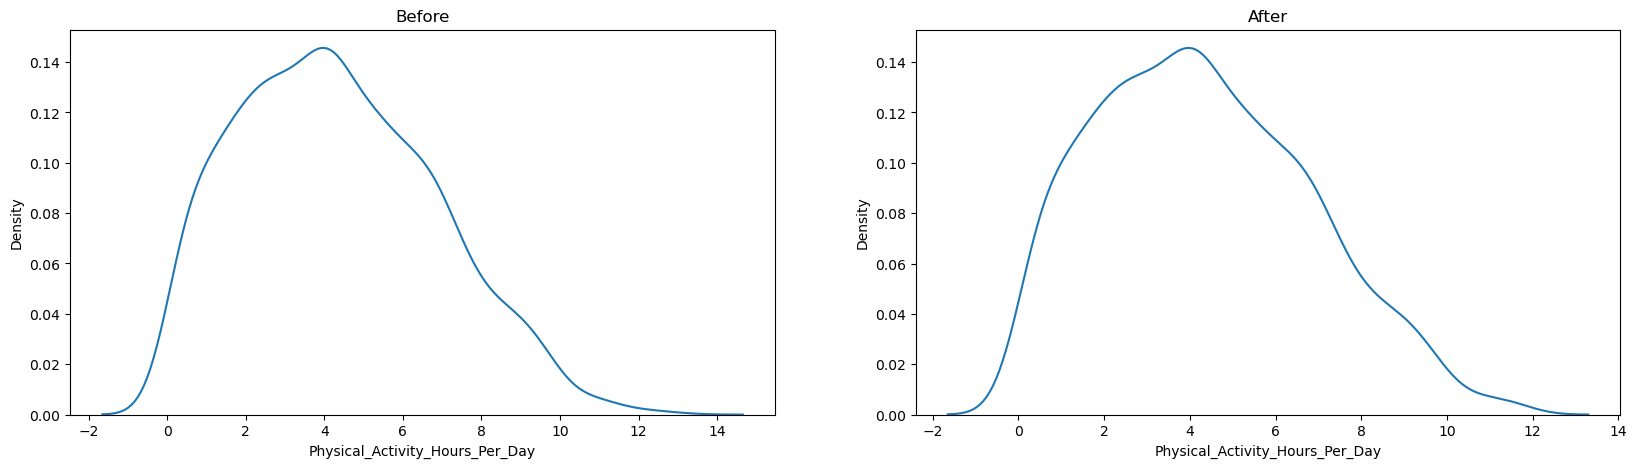

In [216]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.kdeplot(df['Physical_Activity_Hours_Per_Day'])
plt.title('Before')
plt.subplot(122)
sns.kdeplot(new_df['Physical_Activity_Hours_Per_Day'])
plt.title('After')
plt.show()

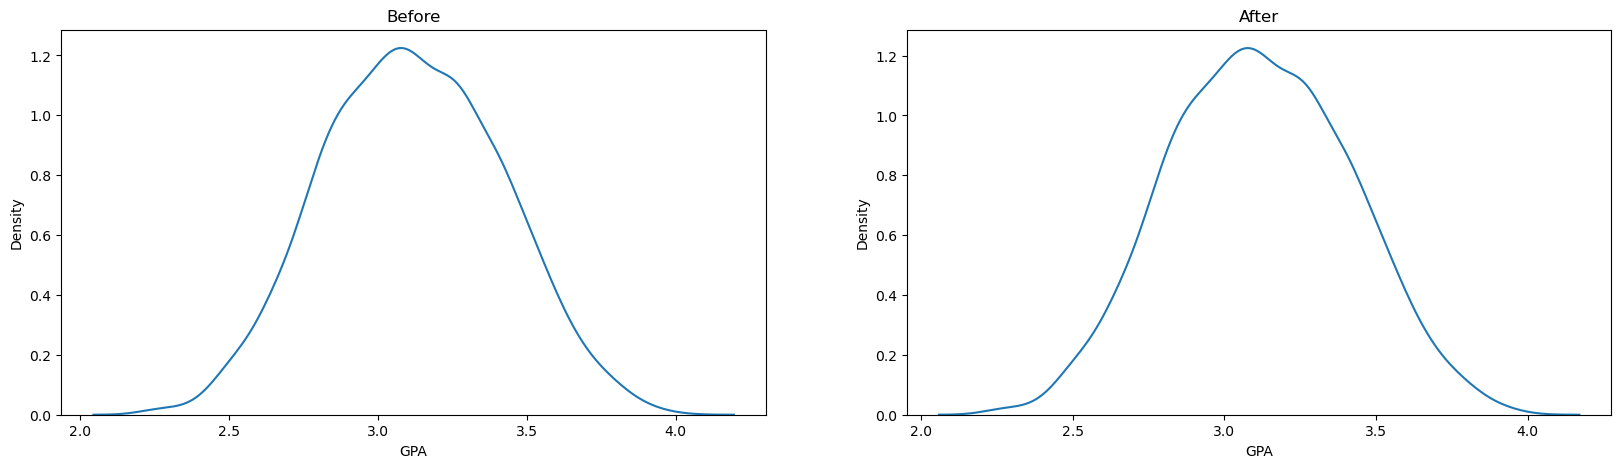

In [218]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.kdeplot(df['GPA'])
plt.title('Before')
plt.subplot(122)
sns.kdeplot(newnew_df['GPA'])
plt.title('After')
plt.show()

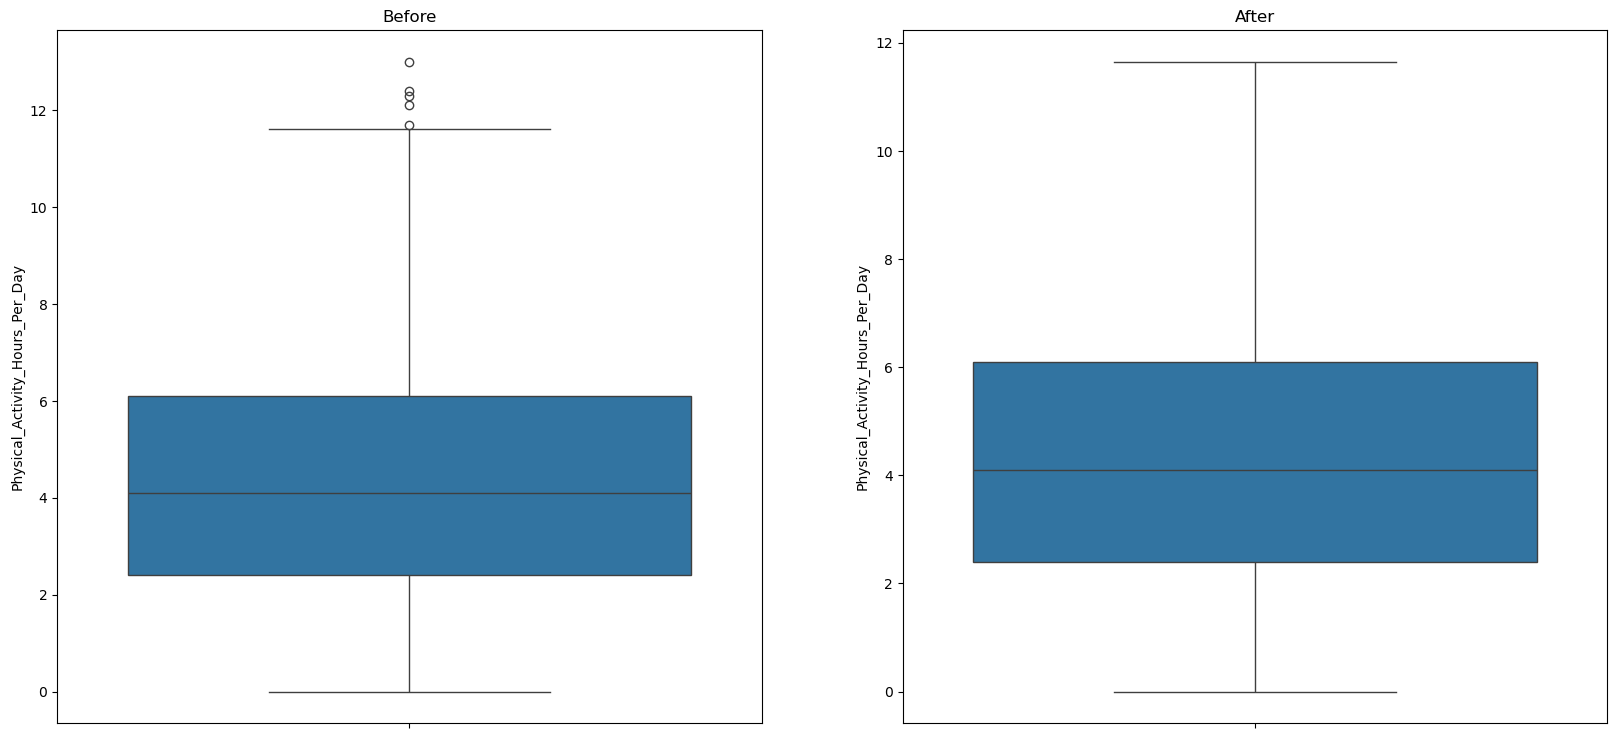

In [222]:
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.boxplot(df['Physical_Activity_Hours_Per_Day'])
plt.title('Before')
plt.subplot(122)
sns.boxplot(new_df['Physical_Activity_Hours_Per_Day'])
plt.title('After')
plt.show()

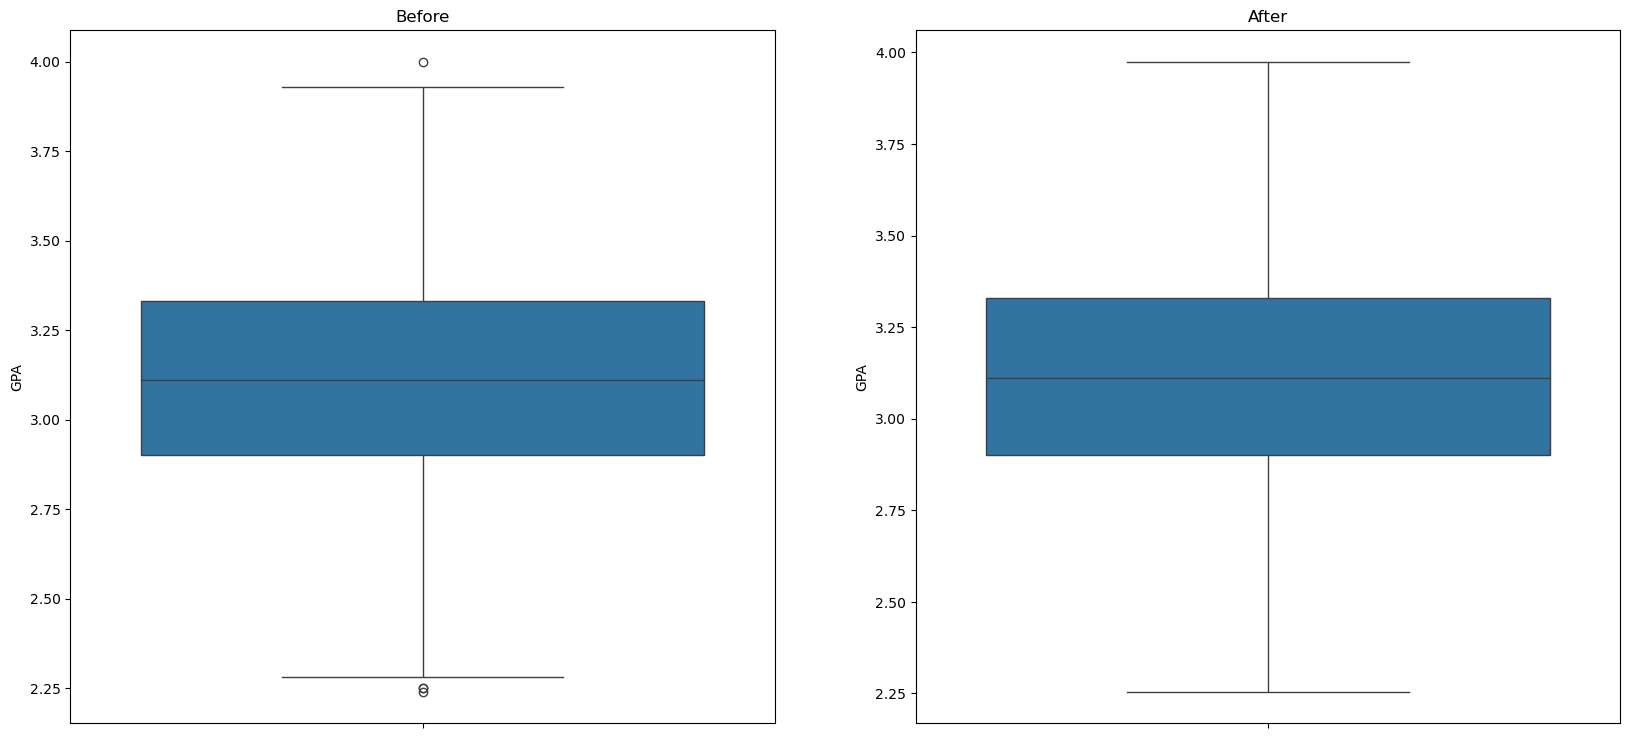

In [224]:
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.boxplot(df['GPA'])
plt.title('Before')
plt.subplot(122)
sns.boxplot(newnew_df['GPA'])
plt.title('After')
plt.show()